In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from scipy.signal import butter,filtfilt
from scipy.interpolate import make_interp_spline, BSpline
from adjustText import adjust_text
import matplotlib.lines as mlines
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

def compute_metrics(df_reviewer, df_final, name="Reviewer"):
    
    # Merge with ground truth
    df = df_reviewer.merge(df_final, on="paper_id", suffixes=("_pred", "_true"))
    
    y_true = df["label_true"]
    y_pred = df["label_pred"]
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # ---- Core Rates ----
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0          # Sensitivity / Recall
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0          # Specificity
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0          # Fall-out
    FNR = fn / (tp + fn) if (tp + fn) > 0 else 0          # Miss rate
    
    PPV = tp / (tp + fp) if (tp + fp) > 0 else 0          # Precision
    NPV = tn / (tn + fn) if (tn + fn) > 0 else 0          # Negative predictive value
    
    # ---- Balanced Accuracy (manual formula) ----
    BAC = 0.5 * (TPR + TNR)
    
    # ---- F1 score (manual formula) ----
    F1 = (2 * PPV * TPR) / (PPV + TPR) if (PPV + TPR) > 0 else 0
    
    # ---- P4 score (harmonic mean of PPV, TPR, TNR, NPV) ----
    if PPV > 0 and TPR > 0 and TNR > 0 and NPV > 0:
        P4 = 4 / ((1/PPV) + (1/TPR) + (1/TNR) + (1/NPV))
    else:
        P4 = 0
    
    
    results = {
        "Reviewer": name,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TPR": TPR,
        "TNR": TNR,
        "FPR": FPR,
        "FNR": FNR,
        "PPV": PPV,
        "NPV": NPV,
        "BAC": BAC,
        "F1": F1,
        "P4": P4

    }
    
    return results


matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)



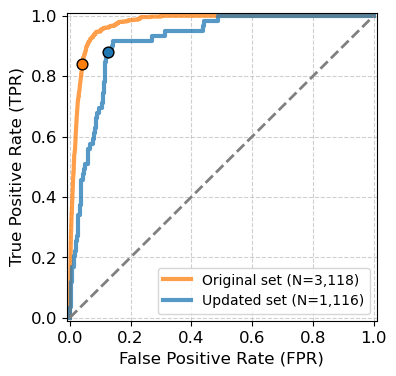

In [31]:
df_oot = pd.read_excel("roc_curve_aim_review_fusion.xlsx")
df1 = pd.read_excel("oocv_fusion.xlsx")

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(df1["true_label"], df1["probability"])

# Create ROC dataframe
df_oocv = pd.DataFrame({
    "fpr": fpr,
    "tpr": tpr,
    "prob": thresholds
})

plt.figure(figsize=(4,4))  
plt.plot(df_oot["fpr"], df_oot["tpr"], color='tab:orange',  alpha = 0.75, label = 'Original set (N=3,118)', linewidth=3)
plt.plot(df_oocv["fpr"], df_oocv["tpr"], color='tab:blue', alpha = 0.75, label = 'Updated set (N=1,116)', linewidth=3)


# Plot the diagonal line
plt.plot([0, 1], [0, 1], color = "grey", lw=2, linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)

plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])


# --- OOT dataset (orange) ---
idx_oot = (df_oot["prob"] - 0.5).abs().idxmin()
fpr_oot_05 = df_oot.loc[idx_oot, "fpr"]
tpr_oot_05 = df_oot.loc[idx_oot, "tpr"]

plt.scatter(fpr_oot_05, tpr_oot_05, 
            color='tab:orange', 
            s=60, 
            edgecolor='black',
            zorder=5)

# --- OOCV dataset (blue) ---
idx_oocv = (df_oocv["prob"] - 0.5).abs().idxmin()
fpr_oocv_05 = df_oocv.loc[idx_oocv, "fpr"]
tpr_oocv_05 = df_oocv.loc[idx_oocv, "tpr"]

plt.scatter(fpr_oocv_05, tpr_oocv_05, 
            color='tab:blue', 
            s=60, 
            edgecolor='black',
            zorder=5)

plt.legend()

# Add grid and ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ensure the aspect ratio is equal
plt.savefig('fig2.1.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

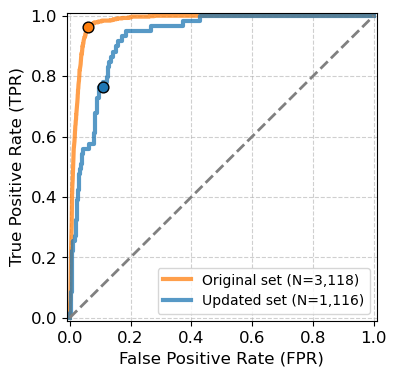

In [32]:
df_oot = pd.read_excel("roc_curve_aim_review.xlsx")
df1 = pd.read_excel("oocv.xlsx")

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(df1["true_label"], df1["probability"])

# Create ROC dataframe
df_oocv = pd.DataFrame({
    "fpr": fpr,
    "tpr": tpr,
    "prob": thresholds
})

plt.figure(figsize=(4,4))  
plt.plot(df_oot["fpr"], df_oot["tpr"], color='tab:orange',  alpha = 0.75, label = 'Original set (N=3,118)', linewidth=3)
plt.plot(df_oocv["fpr"], df_oocv["tpr"], color='tab:blue', alpha = 0.75, label = 'Updated set (N=1,116)', linewidth=3)


# Plot the diagonal line
plt.plot([0, 1], [0, 1], color = "grey", lw=2, linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)

plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])


# --- OOT dataset (orange) ---
idx_oot = (df_oot["prob"] - 0.5).abs().idxmin()
fpr_oot_05 = df_oot.loc[idx_oot, "fpr"]
tpr_oot_05 = df_oot.loc[idx_oot, "tpr"]

plt.scatter(fpr_oot_05, tpr_oot_05, 
            color='tab:orange', 
            s=60, 
            edgecolor='black',
            zorder=5)

# --- OOCV dataset (blue) ---
idx_oocv = (df_oocv["prob"] - 0.5).abs().idxmin()
fpr_oocv_05 = df_oocv.loc[idx_oocv, "fpr"]
tpr_oocv_05 = df_oocv.loc[idx_oocv, "tpr"]

plt.scatter(fpr_oocv_05, tpr_oocv_05, 
            color='tab:blue', 
            s=60, 
            edgecolor='black',
            zorder=5)

plt.legend()

# Add grid and ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ensure the aspect ratio is equal
plt.savefig('fig2.2.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

In [33]:
df_metrics_oot_fusion = pd.read_excel("performance_metrics_aim_review_fusion.xlsx")

# Metrics to plot
metrics = ["TPR", "TNR", "BAC", "P4"]

# Extract averages and std deviations
avg_values_oot = df_metrics_oot_fusion.loc[5, metrics]
std_values_oot = df_metrics_oot_fusion.loc[6, metrics]


df4 = pd.read_excel("labelling_ML_fusion.xlsx")[["paper_id", "label", "probability"]]
df_final = pd.read_excel("agreement_aim_review.xlsx")[["paper_id", "label"]]

results_df = compute_metrics(df4, df_final, "oocv")

# Merge predicted probabilities with ground truth
df_merged = df4.merge(df_final, on="paper_id", suffixes=("_pred", "_true"))

# True labels and predicted probabilities
y_true = df_merged["label_true"]
y_prob = df_merged["probability"]  # probability predictions

# Compute AUROC
AUROC = roc_auc_score(y_true, y_prob)


# Add AUROC to your metrics dictionary
results_df["AUROC"] = AUROC

# Convert to DataFrame
df_metrics_oocv_fusion = pd.DataFrame([results_df])

In [34]:
df_metrics_oot = pd.read_excel("performance_metrics_aim_review.xlsx")

# Metrics to plot
metrics = ["TPR", "TNR", "BAC", "P4"]

# Extract averages and std deviations
avg_values_oot = df_metrics_oot.loc[5, metrics]
std_values_oot = df_metrics_oot.loc[6, metrics]


df4 = pd.read_excel("labelling_ML.xlsx")[["paper_id", "label", "probability"]]
df_final = pd.read_excel("agreement_aim_review.xlsx")[["paper_id", "label"]]

results_df = compute_metrics(df4, df_final, "oocv")

# Merge predicted probabilities with ground truth
df_merged = df4.merge(df_final, on="paper_id", suffixes=("_pred", "_true"))

# True labels and predicted probabilities
y_true = df_merged["label_true"]
y_prob = df_merged["probability"]  # probability predictions

# Compute AUROC
AUROC = roc_auc_score(y_true, y_prob)


# Add AUROC to your metrics dictionary
results_df["AUROC"] = AUROC

# Convert to DataFrame
df_metrics_oocv = pd.DataFrame([results_df])


In [35]:
df_metrics_oot_fusion

,Unnamed: 0,BAC,ACC,TPR,FPR,TNR,FNR,PPV,NPV,F1,MCC,P4,TP,TN,FP,FN,AUC
0,Perm 0,0.906544,0.954458,0.854015,0.040926,0.959074,0.145985,0.489540,0.993053,0.622340,0.626411,0.759973,117.000000,2859.00000,122.00000,20.000000,0.974659
1,Perm 1,0.881332,0.952854,0.802920,0.040255,0.959745,0.197080,0.478261,0.990651,0.599455,0.598015,0.742426,110.000000,2861.00000,120.00000,27.000000,0.973012
2,Perm 2,0.898574,0.952534,0.839416,0.042268,0.957732,0.160584,0.477178,0.992353,0.608466,0.611789,0.749233,115.000000,2855.00000,126.00000,22.000000,0.974486
3,Perm 3,0.902895,0.954137,0.846715,0.040926,0.959074,0.153285,0.487395,0.992708,0.618667,0.621982,0.757178,116.000000,2859.00000,122.00000,21.000000,0.975541
4,Perm 4,0.902392,0.953175,0.846715,0.041932,0.958068,0.153285,0.481328,0.992701,0.613757,0.617649,0.753332,116.000000,2856.00000,125.00000,21.000000,0.973462
5,Avg.,0.898347,0.953432,0.837956,0.041261,0.958739,0.162044,0.482740,0.992293,0.612537,0.615169,0.752428,114.800000,2858.00000,123.00000,22.200000,0.974232
6,Std,0.008875,0.000743,0.018116,0.000735,0.000735,0.018116,0.004917,0.000850,0.008036,0.009845,0.006174,2.481935,2.19089,2.19089,2.481935,0.000899


In [44]:
df_metrics_oocv

,Reviewer,TP,TN,FP,FN,TPR,TNR,FPR,FNR,PPV,NPV,BAC,F1,P4,AUROC
0,oocv,45,954,113,14,0.762712,0.894096,0.105904,0.237288,0.28481,0.985537,0.828404,0.414747,0.575097,0.927867


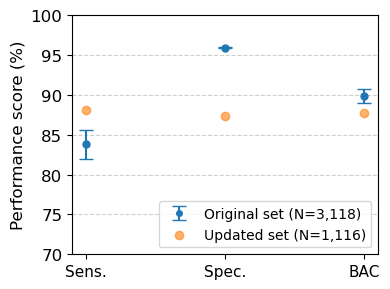

In [37]:
# ----- Extract OOT values (Avg and Std rows) -----
oot_avg = 100*df_metrics_oot_fusion[df_metrics_oot_fusion["Unnamed: 0"] == "Avg."].iloc[0]
oot_std = 100*df_metrics_oot_fusion[df_metrics_oot_fusion["Unnamed: 0"] == "Std"].iloc[0]

metrics = ["TPR", "TNR", "BAC"]  # Sensitivity, Specificity, Balanced Accuracy

oot_means = [oot_avg[m] for m in metrics]
oot_stds  = [oot_std[m] for m in metrics]

# ----- Extract OOCV values -----
oocv_row = df_metrics_oocv_fusion.iloc[0]
oocv_values = [100*oocv_row[m] for m in metrics]

# ----- Plot -----
fig, ax = plt.subplots(figsize=(4, 3))

x_positions = np.arange(len(metrics))

for i, metric in enumerate(metrics):
    
    # OOT: mean ± std (blue)
    plt.errorbar([x_positions[i]], [oot_means[i]],
                 yerr=[oot_stds[i]],
                 fmt='o',
                 capsize=5,
                 markersize=5,
                 ecolor='tab:blue',
                 markerfacecolor='tab:blue',
                 markeredgecolor='tab:blue')
    
    # OOCV: semi-transparent (orange)
    plt.scatter([x_positions[i]], [oocv_values[i]],
                alpha=0.6,
                c='tab:orange',
                edgecolors='tab:orange',
                marker='o')

# ----- Legend -----
l1 = plt.errorbar([10], [10], yerr=[1],
                  fmt="o", capsize=5, markersize=4,
                  ecolor='tab:blue',
                  markerfacecolor='tab:blue',
                  markeredgecolor='tab:blue',
                  label='Original set (N=3,118)')

l2 = plt.scatter([10], [10],
                 alpha=0.6,
                 c='tab:orange',
                 edgecolors='tab:orange',
                 marker="o",
                 label='Updated set (N=1,116)')

plt.legend(handles=[l1, l2], loc="lower right")

# ----- Formatting -----
plt.xticks(x_positions, ["Sens.", "Spec.", "BAC"], fontsize=12)
plt.ylabel("Performance score (%)", fontsize=12)
plt.ylim([70, 100])
plt.xlim(-0.1, 2.1)
plt.grid(True, linestyle='--', alpha=0.6, axis="y")
plt.savefig('fig2.3.pdf', format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()


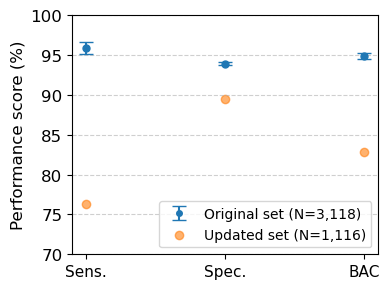

In [42]:
# ----- Extract OOT values (Avg and Std rows) -----
oot_avg = 100*df_metrics_oot[df_metrics_oot["Unnamed: 0"] == "Avg."].iloc[0]
oot_std = 100*df_metrics_oot[df_metrics_oot["Unnamed: 0"] == "Std"].iloc[0]

metrics = ["TPR", "TNR", "BAC"]  # Sensitivity, Specificity, Balanced Accuracy

oot_means = [oot_avg[m] for m in metrics]
oot_stds  = [oot_std[m] for m in metrics]

# ----- Extract OOCV values -----
oocv_row = df_metrics_oocv.iloc[0]
oocv_values = [100*oocv_row[m] for m in metrics]

# ----- Plot -----
fig, ax = plt.subplots(figsize=(4, 3))

x_positions = np.arange(len(metrics))

for i, metric in enumerate(metrics):
    
    # OOT: mean ± std (blue)
    plt.errorbar([x_positions[i]], [oot_means[i]],
                 yerr=[oot_stds[i]],
                 fmt='o',
                 capsize=5,
                 markersize=5,
                 ecolor='tab:blue',
                 markerfacecolor='tab:blue',
                 markeredgecolor='tab:blue')
    
    # OOCV: semi-transparent (orange)
    plt.scatter([x_positions[i]], [oocv_values[i]],
                alpha=0.6,
                c='tab:orange',
                edgecolors='tab:orange',
                marker='o')

# ----- Legend -----
l1 = plt.errorbar([10], [10], yerr=[1],
                  fmt="o", capsize=5, markersize=4,
                  ecolor='tab:blue',
                  markerfacecolor='tab:blue',
                  markeredgecolor='tab:blue',
                  label='Original set (N=3,118)')

l2 = plt.scatter([10], [10],
                 alpha=0.6,
                 c='tab:orange',
                 edgecolors='tab:orange',
                 marker="o",
                 label='Updated set (N=1,116)')

plt.legend(handles=[l1, l2], loc="lower right")

# ----- Formatting -----
plt.xticks(x_positions, ["Sens.", "Spec.", "BAC"], fontsize=12)
plt.ylabel("Performance score (%)", fontsize=12)
plt.ylim([70, 100])
plt.xlim(-0.1, 2.1)
plt.grid(True, linestyle='--', alpha=0.6, axis="y")
plt.savefig('fig2.4.pdf', format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()
